<a href="https://colab.research.google.com/github/siri-thummala/mini-projects-/blob/main/Logistic_regression_dna_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/content/synthetic_dna_dataset.csv")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sample_ID        3000 non-null   object 
 1   Sequence         3000 non-null   object 
 2   GC_Content       3000 non-null   float64
 3   AT_Content       3000 non-null   float64
 4   Sequence_Length  3000 non-null   int64  
 5   Num_A            3000 non-null   int64  
 6   Num_T            3000 non-null   int64  
 7   Num_C            3000 non-null   int64  
 8   Num_G            3000 non-null   int64  
 9   kmer_3_freq      3000 non-null   float64
 10  Mutation_Flag    3000 non-null   int64  
 11  Class_Label      3000 non-null   object 
 12  Disease_Risk     3000 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 304.8+ KB


In [5]:
df.describe()

,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag
count,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,50.120000,49.880000,100.0,24.950667,24.929333,25.004000,25.116000,0.547738,0.496667
std,5.062688,5.062688,0.0,4.317458,4.317702,4.349056,4.329603,0.258521,0.500072
min,34.000000,34.000000,100.0,11.000000,9.000000,10.000000,12.000000,0.100000,0.000000
25%,47.000000,47.000000,100.0,22.000000,22.000000,22.000000,22.000000,0.330000,0.000000
50%,50.000000,50.000000,100.0,25.000000,25.000000,25.000000,25.000000,0.543000,0.000000
75%,53.000000,53.000000,100.0,28.000000,28.000000,28.000000,28.000000,0.772250,1.000000
max,66.000000,66.000000,100.0,40.000000,42.000000,42.000000,42.000000,1.000000,1.000000


In [6]:
df.drop(columns=['Sample_ID'],inplace=True)
df.drop(columns=['Sequence'],inplace=True)

In [7]:
df.head()

,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag,Class_Label,Disease_Risk
0,50.0,50.0,100,22,28,19,31,0.986,0,Bacteria,High
1,45.0,55.0,100,27,28,22,23,0.486,1,Virus,Medium
2,51.0,49.0,100,26,23,30,21,0.367,1,Bacteria,Low
3,55.0,45.0,100,28,17,23,32,0.404,0,Human,Medium
4,46.0,54.0,100,24,30,25,21,0.818,0,Human,High


In [8]:
print(df.duplicated().sum())

0


In [9]:
df_encoded = pd.get_dummies(df, columns=['Class_Label'])
print(df_encoded)

      GC_Content  AT_Content  Sequence_Length  Num_A  Num_T  Num_C  Num_G  \
0           50.0        50.0              100     22     28     19     31   
1           45.0        55.0              100     27     28     22     23   
2           51.0        49.0              100     26     23     30     21   
3           55.0        45.0              100     28     17     23     32   
4           46.0        54.0              100     24     30     25     21   
...          ...         ...              ...    ...    ...    ...    ...   
2995        46.0        54.0              100     30     24     27     19   
2996        49.0        51.0              100     28     23     24     25   
2997        53.0        47.0              100     21     26     30     23   
2998        46.0        54.0              100     26     28     25     21   
2999        46.0        54.0              100     33     21     29     17   

      kmer_3_freq  Mutation_Flag Disease_Risk  Class_Label_Bacteria  \
0   

In [16]:
X = df_encoded.drop('Disease_Risk', axis=1)  # all columns except Disease_Risk
y = df_encoded['Disease_Risk']               # only label column


In [17]:
X.head()

,GC_Content,AT_Content,Sequence_Length,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag,Class_Label_Bacteria,Class_Label_Human,Class_Label_Plant,Class_Label_Virus
0,50.0,50.0,100,22,28,19,31,0.986,0,True,False,False,False
1,45.0,55.0,100,27,28,22,23,0.486,1,False,False,False,True
2,51.0,49.0,100,26,23,30,21,0.367,1,True,False,False,False
3,55.0,45.0,100,28,17,23,32,0.404,0,False,True,False,False
4,46.0,54.0,100,24,30,25,21,0.818,0,False,True,False,False


In [18]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
model=LogisticRegression()

In [20]:
model.fit(Xtrain,ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
ypred=model.predict(Xtest)

In [24]:
ypred

array(['High', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'High', 'Low', 'High', 'Low', 'Low',
       'High', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'High', 'High', 'High', 'High', 'Medium', 'Low', 'High', 'Low',
       'High', 'High', 'High', 'High', 'Medium', 'High', 'High', 'Medium',
       'High', 'High', 'Low', 'High', 'High', 'Low', 'High', 'Low',
       'High', 'High', 'Low', 'High', 'High', 'Medium', 'Low', 'High',
       'Low', 'Low', 'High', 'Low', 'Low', 'High', 'High', 'Low', 'High',
       'Medium', 'Low', 'Medium', 'High', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'Low', 'High', 'High', 'Medium', 'High', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'High',
       'Medium', 'Low', 'High', 'Medium', 'Medium', 'High', 'High',
       'High', 'High', 'High', 'High', 'Low', 'High', 'Low', 'Medium',
       'High', 'High', 'High', 'Medium', 'High', 'High', 'Low', 

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
cm=confusion_matrix(ytest,ypred)

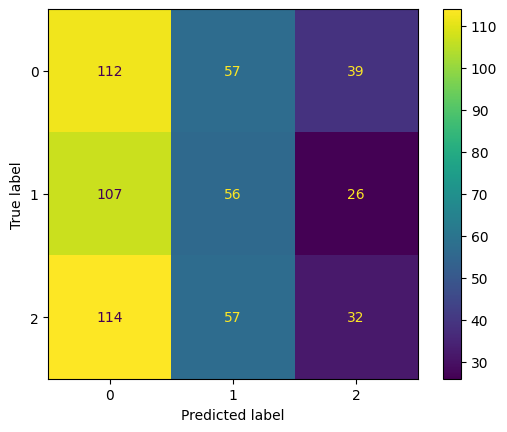

In [28]:
dis=ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot()
plt.show()